# Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
obj="oj287"

In [6]:
freq="x-rays"
labelleft= "photons/cm^2/s"
instr = " FERMI "
data = pd.read_csv("data/"+obj+"_"+freq+"_web-lc.csv", sep=",", comment='#')
data.columns = ['obs', 'Flux']
data['Flux'] = data['Flux'].apply(pd.to_numeric, errors='coerce').fillna(0)
pd.set_option('display.max_rows', None)
data['Flux'].max()

3.4797129712196373

In [7]:
data.loc[:, 'norm'] = data['Flux']/data['Flux'].max()
data['norm'] = data['norm']*100 ###
data['norm'] = data['norm'].astype(int)
data['norm'].head()

0    0
1    0
2    4
3    5
4    5
Name: norm, dtype: int64

# DATE TIME

In [8]:
import datetime
from miditime.miditime import MIDITime

In [9]:
#tempo 80 bpm, file, seconds/year, octave (5 is default C5), número de octaves per output
#mymidi = MIDITime(10,"data/"+obj+"_"+freq+"_sonified.mid",7,3,4) 
mymidi = MIDITime(80,"data/"+obj+"_"+freq+"_sonified.mid",7,3,4) 

In [10]:
data['norm'].dtypes

dtype('int64')

In [11]:
data['norm'].astype(int)

0         0
1         0
2         4
3         5
4         5
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
30        6
31        6
32        7
33        7
34        7
35        7
36        7
37        7
38        7
39        7
40        7
41        7
42        7
43        7
44        7
45        7
46        7
47        7
48        7
49        7
50        7
51        7
52        7
53        7
54        7
55        7
56        7
57        7
58        7
59        7
60        7
61        7
62        7
63        7
64        7
65        7
66        7
67        7
68        7
69        7
70        7
71        7
72        7
73        7
74        7
75        7
76        7
77        7
78        7
79        7
80        7
81        7
82        7
83  

In [12]:
registros = data['norm']
registros.shape[0]

4209

In [13]:
registros = data['norm']

note_list = []
for i in range(registros.shape[0]):
    scale_pct = mymidi.linear_scale_pct(data['norm'].min(),data['norm'].max(),data['norm'].array[i]) #O es el mínimo y 30 es el máximo escalado.
    d_minor = ['D','E','F','G','A','Bd','C'] 
    note = mymidi.scale_to_note(scale_pct, d_minor)
    midi_pitch = mymidi.note_to_midi_pitch(note)
    note_list.append([mymidi.beat(i),
        midi_pitch,
        90, #90 velocidad
        2 #duracion in beats
    ])    

In [14]:
note_list

[[0.0, 38, 90, 2],
 [0.03, 38, 90, 2],
 [0.05, 38, 90, 2],
 [0.08, 40, 90, 2],
 [0.1, 40, 90, 2],
 [0.13, 40, 90, 2],
 [0.15, 40, 90, 2],
 [0.18, 40, 90, 2],
 [0.2, 40, 90, 2],
 [0.23, 40, 90, 2],
 [0.26, 40, 90, 2],
 [0.28, 40, 90, 2],
 [0.31, 40, 90, 2],
 [0.33, 40, 90, 2],
 [0.36, 40, 90, 2],
 [0.38, 40, 90, 2],
 [0.41, 40, 90, 2],
 [0.43, 40, 90, 2],
 [0.46, 40, 90, 2],
 [0.49, 40, 90, 2],
 [0.51, 40, 90, 2],
 [0.54, 40, 90, 2],
 [0.56, 40, 90, 2],
 [0.59, 40, 90, 2],
 [0.61, 40, 90, 2],
 [0.64, 40, 90, 2],
 [0.66, 40, 90, 2],
 [0.69, 40, 90, 2],
 [0.72, 40, 90, 2],
 [0.74, 40, 90, 2],
 [0.77, 40, 90, 2],
 [0.79, 40, 90, 2],
 [0.82, 40, 90, 2],
 [0.84, 40, 90, 2],
 [0.87, 40, 90, 2],
 [0.89, 40, 90, 2],
 [0.92, 40, 90, 2],
 [0.95, 40, 90, 2],
 [0.97, 40, 90, 2],
 [1.0, 40, 90, 2],
 [1.02, 40, 90, 2],
 [1.05, 40, 90, 2],
 [1.07, 40, 90, 2],
 [1.1, 40, 90, 2],
 [1.12, 40, 90, 2],
 [1.15, 40, 90, 2],
 [1.18, 40, 90, 2],
 [1.2, 40, 90, 2],
 [1.23, 40, 90, 2],
 [1.25, 40, 90, 2],
 [1.28

In [15]:
mymidi.add_track(note_list)
mymidi

In [16]:
mymidi.save_midi()

38 0.0 2 90
38 0.03 2 90
38 0.05 2 90
40 0.08 2 90
40 0.1 2 90
40 0.13 2 90
40 0.15 2 90
40 0.18 2 90
40 0.2 2 90
40 0.23 2 90
40 0.26 2 90
40 0.28 2 90
40 0.31 2 90
40 0.33 2 90
40 0.36 2 90
40 0.38 2 90
40 0.41 2 90
40 0.43 2 90
40 0.46 2 90
40 0.49 2 90
40 0.51 2 90
40 0.54 2 90
40 0.56 2 90
40 0.59 2 90
40 0.61 2 90
40 0.64 2 90
40 0.66 2 90
40 0.69 2 90
40 0.72 2 90
40 0.74 2 90
40 0.77 2 90
40 0.79 2 90
40 0.82 2 90
40 0.84 2 90
40 0.87 2 90
40 0.89 2 90
40 0.92 2 90
40 0.95 2 90
40 0.97 2 90
40 1.0 2 90
40 1.02 2 90
40 1.05 2 90
40 1.07 2 90
40 1.1 2 90
40 1.12 2 90
40 1.15 2 90
40 1.18 2 90
40 1.2 2 90
40 1.23 2 90
40 1.25 2 90
40 1.28 2 90
40 1.3 2 90
40 1.33 2 90
40 1.35 2 90
40 1.38 2 90
40 1.41 2 90
40 1.43 2 90
40 1.46 2 90
40 1.48 2 90
40 1.51 2 90
40 1.53 2 90
40 1.56 2 90
40 1.58 2 90
40 1.61 2 90
40 1.64 2 90
40 1.66 2 90
40 1.69 2 90
40 1.71 2 90
40 1.74 2 90
40 1.76 2 90
40 1.79 2 90
40 1.81 2 90
40 1.84 2 90
40 1.87 2 90
40 1.89 2 90
40 1.92 2 90
40 1.94 2 90
40 1.9

40 26.19 2 90
40 26.22 2 90
40 26.24 2 90
40 26.27 2 90
40 26.29 2 90
40 26.32 2 90
40 26.35 2 90
40 26.37 2 90
40 26.4 2 90
40 26.42 2 90
40 26.45 2 90
40 26.47 2 90
40 26.5 2 90
40 26.52 2 90
40 26.55 2 90
40 26.58 2 90
40 26.6 2 90
40 26.63 2 90
40 26.65 2 90
40 26.68 2 90
40 26.7 2 90
40 26.73 2 90
40 26.75 2 90
40 26.78 2 90
40 26.81 2 90
40 26.83 2 90
40 26.86 2 90
40 26.88 2 90
40 26.91 2 90
40 26.93 2 90
40 26.96 2 90
40 26.98 2 90
40 27.01 2 90
40 27.04 2 90
40 27.06 2 90
40 27.09 2 90
40 27.11 2 90
40 27.14 2 90
40 27.16 2 90
40 27.19 2 90
40 27.21 2 90
40 27.24 2 90
40 27.27 2 90
40 27.29 2 90
40 27.32 2 90
40 27.34 2 90
40 27.37 2 90
40 27.39 2 90
40 27.42 2 90
40 27.44 2 90
40 27.47 2 90
40 27.5 2 90
40 27.52 2 90
40 27.55 2 90
40 27.57 2 90
40 27.6 2 90
40 27.62 2 90
40 27.65 2 90
40 27.67 2 90
40 27.7 2 90
40 27.73 2 90
40 27.75 2 90
40 27.78 2 90
40 27.8 2 90
40 27.83 2 90
40 27.85 2 90
40 27.88 2 90
40 27.9 2 90
40 27.93 2 90
40 27.96 2 90
40 27.98 2 90
41 28.01 2 90
4

41 43.26 2 90
41 43.29 2 90
41 43.31 2 90
41 43.34 2 90
41 43.36 2 90
41 43.39 2 90
41 43.42 2 90
41 43.44 2 90
41 43.47 2 90
41 43.49 2 90
41 43.52 2 90
41 43.54 2 90
41 43.57 2 90
41 43.59 2 90
41 43.62 2 90
41 43.64 2 90
41 43.67 2 90
41 43.7 2 90
41 43.72 2 90
41 43.75 2 90
41 43.77 2 90
41 43.8 2 90
41 43.82 2 90
41 43.85 2 90
41 43.87 2 90
41 43.9 2 90
41 43.93 2 90
41 43.95 2 90
41 43.98 2 90
41 44.0 2 90
41 44.03 2 90
41 44.05 2 90
41 44.08 2 90
41 44.1 2 90
41 44.13 2 90
41 44.16 2 90
41 44.18 2 90
41 44.21 2 90
41 44.23 2 90
41 44.26 2 90
41 44.28 2 90
41 44.31 2 90
41 44.33 2 90
41 44.36 2 90
41 44.39 2 90
41 44.41 2 90
41 44.44 2 90
41 44.46 2 90
41 44.49 2 90
41 44.51 2 90
41 44.54 2 90
41 44.56 2 90
41 44.59 2 90
41 44.62 2 90
41 44.64 2 90
41 44.67 2 90
41 44.69 2 90
41 44.72 2 90
41 44.74 2 90
41 44.77 2 90
41 44.79 2 90
41 44.82 2 90
41 44.85 2 90
41 44.87 2 90
41 44.9 2 90
41 44.92 2 90
41 44.95 2 90
41 44.97 2 90
41 45.0 2 90
41 45.02 2 90
41 45.05 2 90
41 45.08 2 90

40 58.87 2 90
40 58.9 2 90
40 58.93 2 90
40 58.95 2 90
40 58.98 2 90
40 59.0 2 90
40 59.03 2 90
40 59.05 2 90
40 59.08 2 90
40 59.1 2 90
40 59.13 2 90
40 59.16 2 90
40 59.18 2 90
40 59.21 2 90
40 59.23 2 90
40 59.26 2 90
40 59.28 2 90
40 59.31 2 90
40 59.33 2 90
40 59.36 2 90
40 59.39 2 90
40 59.41 2 90
40 59.44 2 90
40 59.46 2 90
40 59.49 2 90
40 59.51 2 90
40 59.54 2 90
40 59.56 2 90
40 59.59 2 90
40 59.62 2 90
40 59.64 2 90
40 59.67 2 90
40 59.69 2 90
40 59.72 2 90
40 59.74 2 90
40 59.77 2 90
40 59.79 2 90
40 59.82 2 90
40 59.85 2 90
40 59.87 2 90
40 59.9 2 90
40 59.92 2 90
40 59.95 2 90
40 59.97 2 90
40 60.0 2 90
40 60.02 2 90
40 60.05 2 90
40 60.08 2 90
40 60.1 2 90
40 60.13 2 90
40 60.15 2 90
40 60.18 2 90
40 60.2 2 90
40 60.23 2 90
40 60.25 2 90
40 60.28 2 90
40 60.31 2 90
40 60.33 2 90
40 60.36 2 90
40 60.38 2 90
40 60.41 2 90
40 60.43 2 90
40 60.46 2 90
40 60.48 2 90
40 60.51 2 90
40 60.54 2 90
40 60.56 2 90
40 60.59 2 90
40 60.61 2 90
40 60.64 2 90
40 60.66 2 90
40 60.69 2 90

79 86.8 2 90
77 86.83 2 90
74 86.86 2 90
72 86.88 2 90
72 86.91 2 90
72 86.93 2 90
69 86.96 2 90
67 86.98 2 90
65 87.01 2 90
64 87.03 2 90
62 87.06 2 90
60 87.09 2 90
60 87.11 2 90
57 87.14 2 90
57 87.16 2 90
55 87.19 2 90
55 87.21 2 90
53 87.24 2 90
53 87.26 2 90
53 87.29 2 90
52 87.32 2 90
52 87.34 2 90
52 87.37 2 90
52 87.39 2 90
52 87.42 2 90
50 87.44 2 90
50 87.47 2 90
50 87.49 2 90
48 87.52 2 90
48 87.55 2 90
48 87.57 2 90
48 87.6 2 90
48 87.62 2 90
45 87.65 2 90
45 87.67 2 90
45 87.7 2 90
43 87.72 2 90
43 87.75 2 90
43 87.78 2 90
43 87.8 2 90
43 87.83 2 90
43 87.85 2 90
43 87.88 2 90
41 87.9 2 90
41 87.93 2 90
41 87.95 2 90
41 87.98 2 90
41 88.01 2 90
41 88.03 2 90
41 88.06 2 90
41 88.08 2 90
41 88.11 2 90
41 88.13 2 90
41 88.16 2 90
41 88.18 2 90
40 88.21 2 90
40 88.24 2 90
40 88.26 2 90
40 88.29 2 90
40 88.31 2 90
40 88.34 2 90
40 88.36 2 90
40 88.39 2 90
40 88.41 2 90
40 88.44 2 90
40 88.47 2 90
40 88.49 2 90
40 88.52 2 90
40 88.54 2 90
40 88.57 2 90
40 88.59 2 90
40 88.62 2 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.cm as cm
from matplotlib import colors as c
from matplotlib.pylab import rcParams

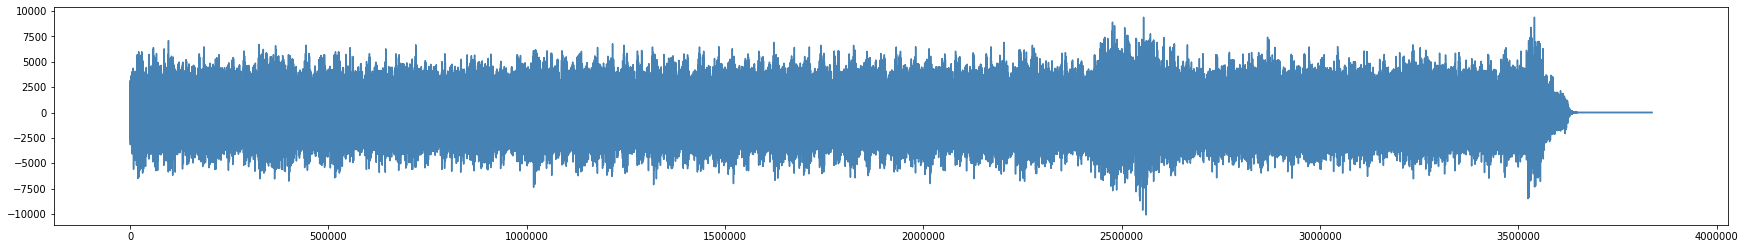

<Figure size 432x288 with 0 Axes>

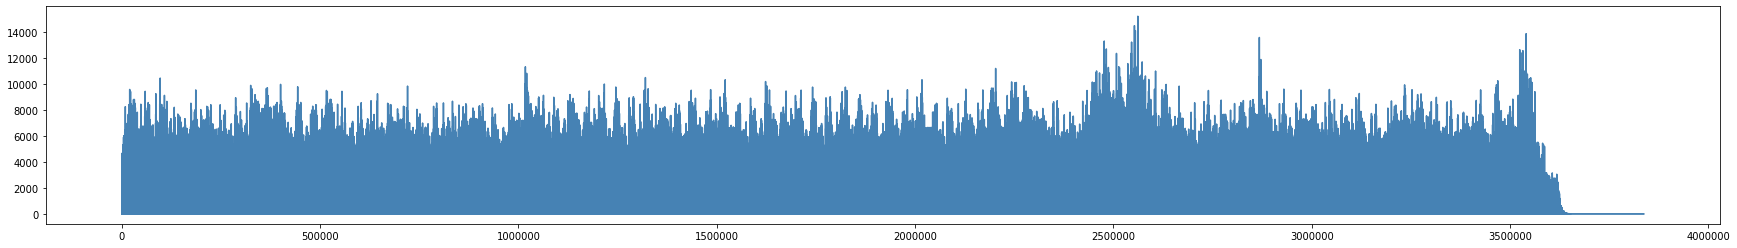

<Figure size 432x288 with 0 Axes>

In [18]:
def plot(data):
    plt.figure(figsize=(30, 4))
    plt.plot(data, color='steelblue')
    plt.figure()
    plt.show()

#rate, wav_data = wavfile.read("audio_self/on/on.wav")
rate, wav_data = wavfile.read("../../../lmms/oj287_x-rays-trend.wav")

plot(wav_data)
plot(np.abs(np.fft.fft(wav_data)))

In [20]:
sample_rate, samples = wavfile.read("../../../lmms/oj287_x-rays_mono-trend.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)


/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


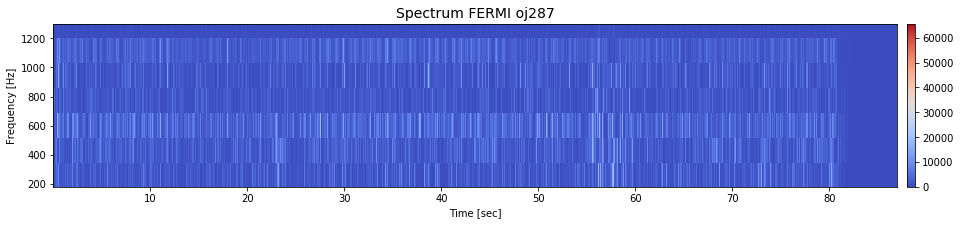

In [26]:
#plt.pcolormesh(times, frequencies, spectrogram)
#plt.figure(figsize=(30, 14))
rcParams['figure.figsize'] = 18, 3
colours = ("blue", "green", "red")
cmap = c.ListedColormap(colours)
plt.pcolormesh(times, frequencies, spectrogram, cmap='coolwarm')

plt.title('Spectrum'+instr+obj, fontsize=14)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([times.min(),times.max(),180, 1300])
plt.colorbar(pad=0.01)
plt.savefig("images/"+obj+"_"+freq+"_spectrum.png", format="png", dpi=300)
plt.show()

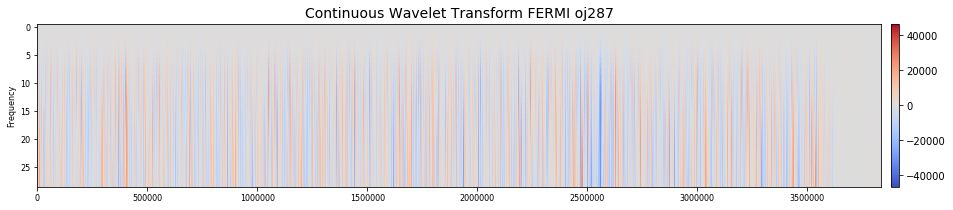

In [27]:
from scipy import signal
rcParams['figure.figsize'] = 18, 3
plt.subplot(111)
widths = np.arange(1,30)
cwtmatr = signal.cwt(samples, signal.ricker, widths)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.title('Continuous Wavelet Transform'+instr+obj, fontsize=14)
plt.imshow(cwtmatr, aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max(), cmap='coolwarm')
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=8)
plt.savefig("images/"+obj+"_"+freq+"_wavelets.png", format="png", dpi=300)

In [21]:
!pwd

/home/wattie/oj287_lc/freq/gamma/midi
